In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as ppt
from sklearn import linear_model
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from linearmodels import OLS
import evaluation_functions

## Create data

In [16]:
# Create data
df_data = pd.DataFrame(index=range(1000))
a_true = 10.
b1_true = 2.
b2_true = 0.
sigma = 1.
df_data['x1'] = np.random.uniform(0, 10, df_data.shape[0])
df_data['x2'] = np.random.uniform(0, 10, df_data.shape[0]) # not important
df_data['eps'] = np.random.normal(0, sigma, df_data.shape[0])
df_data['y'] = a_true + b1_true*df_data['x1'] + b2_true*df_data['x2'] + df_data['eps']
df_data.head()

,x1,x2,eps,y
0,6.539725,9.641734,0.328330,23.407780
1,7.091914,4.101019,0.348747,24.532576
2,0.099960,8.590184,0.330782,10.530701
3,4.003843,7.748039,-0.270596,17.737090
4,8.287625,9.077547,1.628188,28.203438


## Estimate model

In [17]:
exog = df_data[['x1','x2']]
exog = sm.add_constant(exog)
endog = df_data['y']
mod = OLS(endog, exog) #, entity_effects=True,time_effects=True)
res = mod.fit() #cov_type='clustered', cluster_entity=True)
a_est = res.params[0]
b1_est = res.params[1]
b2_est = res.params[2]
print(res)

                            OLS Estimation Summary                            
Dep. Variable:                      y   R-squared:                      0.9691
Estimator:                        OLS   Adj. R-squared:                 0.9690
No. Observations:                1000   F-statistic:                 3.247e+04
Date:                Wed, Aug 16 2023   P-value (F-stat)                0.0000
Time:                        10:55:16   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          10.034     0.0871     115.15     0.0000      9.8635      10.205
x1             2.0111     0.0112     179.70     0.00

## Plot data and model

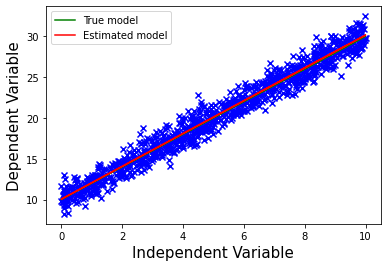

In [18]:
fig, ax = ppt.subplots()
ax.scatter(df_data['x1'], df_data['y'], marker='x', color = 'blue')
ax.plot(df_data['x1'], a_true + b1_true*df_data['x1'] + b2_true*df_data['x2'], color='green', label='True model')
ax.plot(df_data['x1'], a_est + b1_est*df_data['x1'] + b2_true*df_data['x2'], color='red', label='Estimated model')
ax.set_xlabel('Independent Variable', fontsize = 15)
ax.set_ylabel('Dependent Variable', fontsize = 15)
ppt.legend()
ppt.show()

No handles with labels found to put in legend.


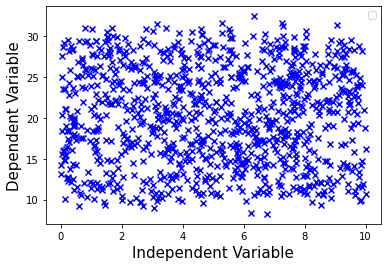

In [21]:
fig, ax = ppt.subplots()
ax.scatter(df_data['x2'], df_data['y'], marker='x', color = 'blue')
#ax.plot(df_data['x2'], a_true + b1_true*df_data['x1'] + b2_true*df_data['x2'], color='green', label='True model')
#ax.plot(df_data['x2'], a_est + b1_est*df_data['x1'] + b2_true*df_data['x2'], color='red', label='Estimated model')
ax.set_xlabel('Independent Variable', fontsize = 15)
ax.set_ylabel('Dependent Variable', fontsize = 15)
ppt.legend()
ppt.show()